# TinyML - MicroMobileNet 

#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores


## 0. Install the libraries listed in the requirements.txt file

In [1]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from micromobilenet import PicoMobileNet
from micromobilenet import NanoMobileNet
from micromobilenet import MicroMobileNet
from micromobilenet import MilliMobileNet
from micromobilenet import MobileNet

## 2. Load Dataset

In [3]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, untar=True)

## 3. Splitting the data

In [4]:
IMG_SIZE = (96, 96)
BATCH_SIZE = 1

# Pré-processamento: Convertemos as imagens para escala de cinza
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',  # Carregar em escala de cinza
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',  # Carregar em escala de cinza
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [5]:
# Processing X_train and y_train
X_train, y_train = [], []
for _ in range(len(train_data)):
    images, labels = train_data.next()
    X_train.append(images[0])
    y_train.append(labels[0])

# Convert lists to numpy arrays
X_train = np.array(X_train).astype(np.uint16)
y_train = np.array(y_train)

# One-hot encode y_train and convert to uint16
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5).astype(np.uint16)

# Processing X_val and y_val
X_val, y_val = [], []
for _ in range(len(val_data)):
    images, labels = val_data.next()
    X_val.append(images[0])
    y_val.append(labels[0])

# Convert lists to numpy arrays
X_val = np.array(X_val).astype(np.uint16)
y_val = np.array(y_val)

# One-hot encode y_val and convert to uint16
y_val = tf.keras.utils.to_categorical(y_val, num_classes=5).astype(np.uint16)

## 4. Exploratory Data Analysis

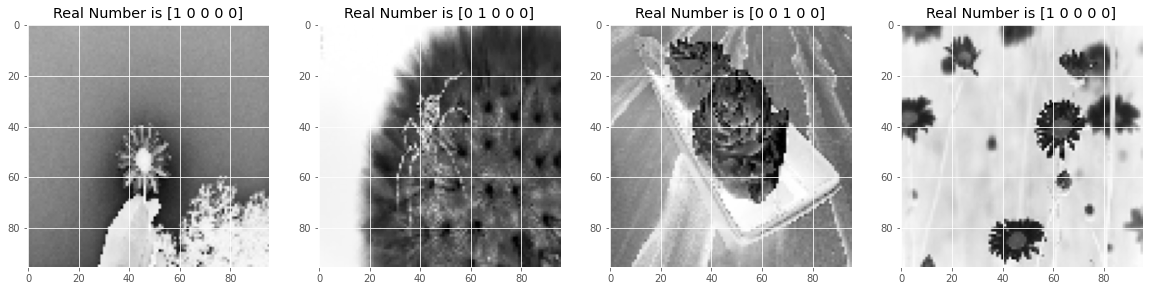

In [8]:
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train[i], cmap='binary')
    digit = y_train[i]
    ax.set(title = f"Real Number is {digit}")

## 5. Define the model

In [9]:
num_classes = y_train.shape[1]
print('Numbers of classes: ', num_classes)

Numbers of classes:  5


### 5.1  PicoMobileNet

In [10]:
model_pico = PicoMobileNet(num_classes=num_classes)
model_pico.config.learning_rate = 0.001
model_pico.config.batch_size = 32
model_pico.config.verbosity = 1
model_pico.config.checkpoint_min_accuracy = 0.65
model_pico.config.loss = "categorical_crossentropy"
model_pico.config.metrics = ["categorical_accuracy"]
model_pico.config.checkpoint_path = "checkpoints/pico"

model_pico.build()
model_pico.compile()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0 (Conv2D)           (None, 32, 32, 3)         27        
                                                                 
 hidden_1__padding (ZeroPad  (None, 34, 34, 3)         0         
 ding2D)                                                         
                                                                 
 hidden_1__dw (DepthwiseCon  (None, 16, 16, 3)         27        
 v2D)                                                            
                                                                 
 hidden_1__relu_1 (ReLU)     (None, 16, 16, 3)         0         
                                                                 
 hidden_1__pw (Conv2D)       (None, 16, 16, 6)         18        
                                                                 
 hidden_1__relu_2 (ReLU)     (None, 16, 16, 6)        

### 5.2  NanoMobileNet

In [11]:
model_nano = NanoMobileNet(num_classes=num_classes)
model_nano.config.learning_rate = 0.001
model_nano.config.batch_size = 32
model_nano.config.verbosity = 1
model_nano.config.checkpoint_min_accuracy = 0.65
model_nano.config.loss = "categorical_crossentropy"
model_nano.config.metrics = ["categorical_accuracy"]
model_nano.config.checkpoint_path = "checkpoints/nano"

model_nano.build()
model_nano.compile()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0 (Conv2D)           (None, 47, 47, 3)         27        
                                                                 
 hidden_1__padding (ZeroPad  (None, 49, 49, 3)         0         
 ding2D)                                                         
                                                                 
 hidden_1__dw (DepthwiseCon  (None, 24, 24, 3)         27        
 v2D)                                                            
                                                                 
 hidden_1__relu_1 (ReLU)     (None, 24, 24, 3)         0         
                                                                 
 hidden_1__pw (Conv2D)       (None, 24, 24, 6)         18        
                                                                 
 hidden_1__relu_2 (ReLU)     (None, 24, 24, 6)        

### 5.3  MicroMobileNet

In [12]:
model_micro = MicroMobileNet(num_classes=num_classes)
model_micro.config.learning_rate = 0.001
model_micro.config.batch_size = 32
model_micro.config.verbosity = 1
model_micro.config.checkpoint_min_accuracy = 0.65
model_micro.config.loss = "categorical_crossentropy"
model_micro.config.metrics = ["categorical_accuracy"]
model_micro.config.checkpoint_path = "checkpoints/micro"

model_micro.build()
model_micro.compile()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0 (Conv2D)           (None, 47, 47, 3)         27        
                                                                 
 hidden_1__padding (ZeroPad  (None, 49, 49, 3)         0         
 ding2D)                                                         
                                                                 
 hidden_1__dw (DepthwiseCon  (None, 47, 47, 3)         27        
 v2D)                                                            
                                                                 
 hidden_1__relu_1 (ReLU)     (None, 47, 47, 3)         0         
                                                                 
 hidden_1__pw (Conv2D)       (None, 47, 47, 6)         18        
                                                                 
 hidden_1__relu_2 (ReLU)     (None, 47, 47, 6)        

### 5.4  MilliMobileNet

In [13]:
model_milli = MilliMobileNet(num_classes=num_classes)
model_milli.config.learning_rate = 0.001
model_milli.config.batch_size = 32
model_milli.config.verbosity = 1
model_milli.config.checkpoint_min_accuracy = 0.65
model_milli.config.loss = "categorical_crossentropy"
model_milli.config.metrics = ["categorical_accuracy"]
model_milli.config.checkpoint_path = "checkpoints/milli"

model_milli.build()
model_milli.compile()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0 (Conv2D)           (None, 47, 47, 3)         27        
                                                                 
 hidden_1__padding (ZeroPad  (None, 49, 49, 3)         0         
 ding2D)                                                         
                                                                 
 hidden_1__dw (DepthwiseCon  (None, 47, 47, 3)         27        
 v2D)                                                            
                                                                 
 hidden_1__relu_1 (ReLU)     (None, 47, 47, 3)         0         
                                                                 
 hidden_1__pw (Conv2D)       (None, 47, 47, 6)         18        
                                                                 
 hidden_1__relu_2 (ReLU)     (None, 47, 47, 6)        

### 5.5  MobileNet

In [27]:
model = MobileNet(num_classes=num_classes)
model.config.learning_rate = 0.01
model.config.batch_size = 32
model.config.verbosity = 1
model.config.checkpoint_min_accuracy = 0.65
model.config.loss = "categorical_crossentropy"
model.config.metrics = ["categorical_accuracy"]
model.config.checkpoint_path = "checkpoints"

model.build()
model.compile()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_0 (Conv2D)           (None, 47, 47, 3)         27        
                                                                 
 hidden_1__padding (ZeroPad  (None, 49, 49, 3)         0         
 ding2D)                                                         
                                                                 
 hidden_1__dw (DepthwiseCon  (None, 47, 47, 3)         27        
 v2D)                                                            
                                                                 
 hidden_1__relu_1 (ReLU)     (None, 47, 47, 3)         0         
                                                                 
 hidden_1__pw (Conv2D)       (None, 47, 47, 6)         18        
                                                                 
 hidden_1__relu_2 (ReLU)     (None, 47, 47, 6)        

## 6.  Training the models

In [28]:
num_epochs = 100

history_pico = model_pico.fit(X_train, y_train, X_val, y_val, epochs=num_epochs)
history_nano = model_nano.fit(X_train, y_train, X_val, y_val, epochs=num_epochs)
history_micro = model_micro.fit(X_train, y_train, X_val, y_val, epochs=num_epochs)
history_milli = model_milli.fit(X_train, y_train, X_val, y_val, epochs=num_epochs)
history_model = model.fit(X_train, y_train, X_val, y_val, epochs=num_epochs)

Epoch 1/100
89/92 [============================>.] - ETA: 0s - loss: 1.3940 - categorical_accuracy: 0.4038
Epoch 1: val_categorical_accuracy did not improve from 0.65000
92/92 [==============================] - 1s 9ms/step - loss: 1.3931 - categorical_accuracy: 0.4056 - val_loss: 1.6162 - val_categorical_accuracy: 0.2914
Epoch 2/100
85/92 [==========================>...] - ETA: 0s - loss: 1.4058 - categorical_accuracy: 0.3952
Epoch 2: val_categorical_accuracy did not improve from 0.65000
92/92 [==============================] - 1s 7ms/step - loss: 1.4021 - categorical_accuracy: 0.3988 - val_loss: 1.6029 - val_categorical_accuracy: 0.2982
Epoch 3/100
87/92 [===========================>..] - ETA: 0s - loss: 1.4034 - categorical_accuracy: 0.4084
Epoch 3: val_categorical_accuracy did not improve from 0.65000
92/92 [==============================] - 1s 6ms/step - loss: 1.4008 - categorical_accuracy: 0.4056 - val_loss: 1.6050 - val_categorical_accuracy: 0.2941
Epoch 4/100
87/92 [============

## 7. Model Evaluation

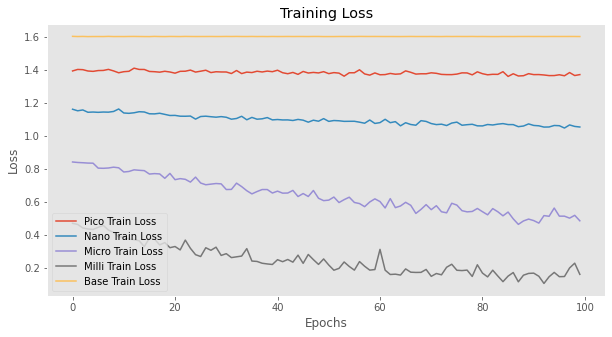

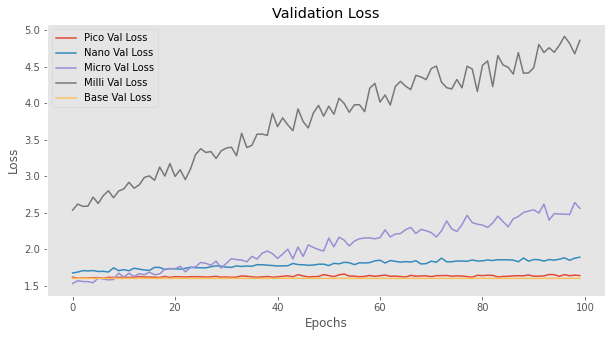

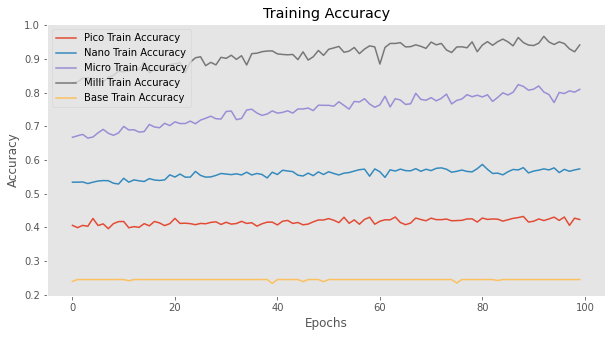

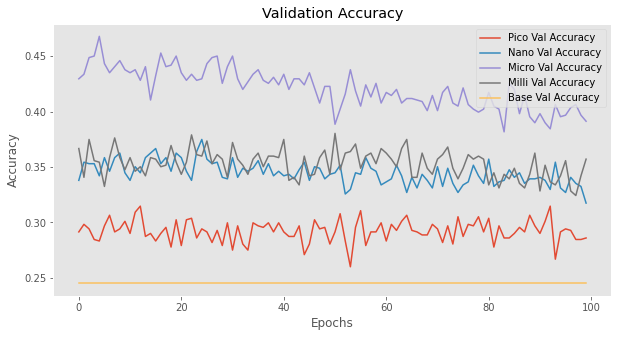

In [38]:

def plot_separate_history(histories):
    # Perda de treino
    plt.figure(figsize=(10, 5))
    for name, history in histories.items():
        plt.plot(history.history.history['loss'], label=f'{name} Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    
    plt.figure(figsize=(10, 5))
    for name, history in histories.items():
        plt.plot(history.history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

 
    plt.figure(figsize=(10, 5))
    for name, history in histories.items():
        plt.plot(history.history.history['categorical_accuracy'], label=f'{name} Train Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

   
    plt.figure(figsize=(10, 5))
    for name, history in histories.items():
        plt.plot(history.history.history['val_categorical_accuracy'], label=f'{name} Val Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


histories = {
    'Pico': history_pico,
    'Nano': history_nano,
    'Micro': history_micro,
    'Milli': history_milli,
    'Base': history_model
}

# Plotando cada histórico em figuras separadas
plot_separate_history(histories)

## 8. Obtaining the model to be implemented in the microcontroller

In [39]:
cpp_pico = model_pico.convert.to_cpp()
cpp_nano = model_nano.convert.to_cpp()
cpp_micro = model_micro.convert.to_cpp()
cpp_milli = model_milli.convert.to_cpp()
cpp_model = model.convert.to_cpp()

## 9. Saves the template in a .h file

In [40]:
with open('./ArduinoCode/model_pico.h', 'w') as file:
    file.write(model_pico.convert.to_cpp())

In [41]:
with open('./ArduinoCode/model_nano.h', 'w') as file:
    file.write(model_nano.convert.to_cpp())

In [42]:
with open('./ArduinoCode/model_micro.h', 'w') as file:
    file.write(model_micro.convert.to_cpp())

In [43]:
with open('./ArduinoCode/model_milli.h', 'w') as file:
    file.write(model_milli.convert.to_cpp())

In [44]:
with open('./ArduinoCode/model.h', 'w') as file:
    file.write(model.convert.to_cpp())

In [ ]:
#y_train[0]
#for i in X_train[0].reshape(1,-1).tolist()[0]:
#    print(i, ',')

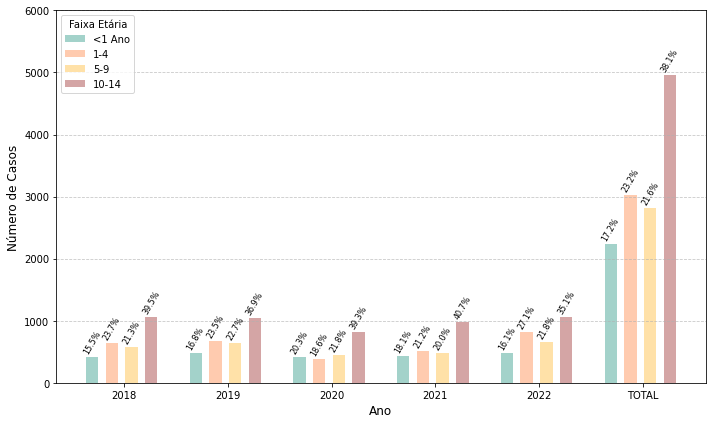

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados de exemplo
data = {
    "Ano Diagnóstico": ["2018", "2019", "2020", "2021", "2022", "TOTAL"],
    "<1 Ano": [418, 478, 421, 436, 484, 2237],
    "1-4": [640, 669, 386, 509, 814, 3018],
    "5-9": [576, 645, 453, 481, 656, 2811],
    "10-14": [1066, 1050, 816, 978, 1055, 4965],
    "Total": [2700, 2842, 2076, 2404, 3009, 13031]
}
df = pd.DataFrame(data)

# Configurações do gráfico
bar_width = 0.12  # Largura das barras individuais (reduzida para dar espaço entre as barras)
space_between_bars = 0.07  # Espaço entre barras do mesmo grupo
# Cores e faixas etárias
age_groups = ["<1 Ano", "1-4", "5-9", "10-14"]
colors = ["#a3d2ca", "#ffcbaf", "#ffe1a8", "#d4a5a5"]

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(df["Ano Diagnóstico"]))

# Plotando as barras lado a lado com espaço entre elas
for i, age_group in enumerate(age_groups):
    # Calcula o percentual para cada barra
    percentages = [(value / total) * 100 for value, total in zip(df[age_group], df["Total"])]
    
    # Posição das barras ajustada com espaço entre elas
    bar_positions = [p + i * (bar_width + space_between_bars) for p in x]
    
    # Plot das barras
    bars = ax.bar(
        bar_positions,
        df[age_group],
        width=bar_width,
        color=colors[i],
        label=age_group
    )
    
    # Adiciona o percentual acima de cada barra
    for bar, percentage in zip(bars, percentages):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 30,
            f"{percentage:.1f}%",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )

# Ajusta os rótulos e posições do eixo x
ax.set_xticks([p + (len(age_groups) * (bar_width + space_between_bars)) / 2 - space_between_bars for p in x])
ax.set_xticklabels(df["Ano Diagnóstico"])

# Personalização do gráfico
#ax.set_title("Distribuição por Faixa Etária e Ano de Diagnóstico com Percentual", fontsize=14)
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Número de Casos", fontsize=12)

ax.legend(title="Faixa Etária", fontsize=10)
ax.grid(True, axis="y", linestyle="--", alpha=0.7)
ax.set_ylim(0, 6000) 
# Mostrar o gráfico
plt.tight_layout()
plt.savefig('distribuicao_faixa_etaria.png', dpi=300)
plt.show()